# Manual strategy
ML for trading Udacity Course exercise

More info:
https://quantsoftware.gatech.edu/Manual_strategy

A transcription of the Udacity Course lectures can be find on https://docs.google.com/document/d/1ELqlnuTSdc9-MDHOkV0uvSY4RmI1eslyQlU9DgOY_jc/edit?usp=sharing

Kairoart 2018
"""


## Overview

In this project you will develop a trading strategy using your intuition and Technical Analysis, and test it against a stock using your market simulator. In a later project, you will use your same indicators but with Machine Learning (instead of your intuition) to create a trading strategy. We hope Machine Learning will do better than your intuition, but who knows? 

## Task

Your code that implements your indicators as functions that operate on dataframes. The code should generate the charts that illustrate your indicators in the report.

**Indicators**

We'll use three tecnical indicators:
* Bolliner Bands.
* Simple Moving Average (SMA)
* TODO

## Data Details, Dates and Rules

* For your report, trade only the symbol JPM. This will enable us to more easily compare results.
* You may use data from other symbols (such as SPY) to inform your strategy.
* The in sample/development period is January 1, 2008 to December 31 2009.
* The out of sample/testing period is January 1, 2010 to December 31 2011.
* Starting cash is 100,000.
* Allowable positions are 1000 shares long, 1000 shares short, 0 shares.
* Benchmark: The performance of a portfolio starting with 100,000 cash, investing in 1000 shares of JPM and holding that position.
* There is no limit on leverage.
* Transaction costs for ManualStrategy: Commission: 9.95, Impact: 0.005.
* Transaction costs for TheoreticallyOptimalStrategy: Commission: 0.00, Impact: 0.00.



## Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import matplotlib.pyplot as plt

# Add parent directory PATH for looking for modules,
import sys
sys.path.insert(0,'..')
from util import get_data, plot_data

# Add plotly for interactive charts
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go

## Part 1: Technical Indicators

Develop and describe at least 3 and at most 5 technical indicators. You may find our lecture on time series processing to be helpful. For each indicator you should create a single, compelling chart that illustrates the indicator.

As an example, you might create a chart that shows the price history of the stock, along with "helper data" (such as upper and lower bollinger bands) and the value of the indicator itself. Another example: If you were using price/SMA as an indicator you would want to create a chart with 3 lines: Price, SMA, Price/SMA. In order to facilitate visualization of the indicator you might normalize the data to 1.0 at the start of the date range (i.e. divide price[t] by price[0]).

Your report description of each indicator should enable someone to reproduce it just by reading the description. We want a written description here, not code, however, it is OK to augment your written description with a pseudocode figure.

At least one of the indicators you use should be completely different from the ones presented in our lectures. (i.e. something other than SMA, Bollinger Bands, RSI). 

### Bollinger Bands

In [79]:
"""Bollinger Bands."""

def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    #values.rolling(window).mean
    return values.rolling(window).mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # todo: Compute and return rolling standard deviation
    #return pd.rolling_std(values, window=window)
    return values.rolling(window).std()


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    # 2 standard deviations aboav the mean.
    # add 2 times the rolling standard deviations of the mean 2*std.

    upper_band = rm + 2 * rstd
    lower_band = rm - 2 * rstd

    return upper_band, lower_band 


def test_run(plotly=False):
    # Read data
    dates = pd.date_range('2008-01-01', '2009-12-31')
    symbols = ['JPM']
    df = get_data(symbols, dates)

    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_JPM = get_rolling_mean(df['JPM'], window=10)

    # 2. Compute rolling standard deviation
    rstd_JPM = get_rolling_std(df['JPM'], window=10)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_JPM, rstd_JPM)
    
    if plotly==False:
        # Plot raw JPM values, rolling mean and Bollinger Bands
        plt.figure(figsize=(16,8))

        ax = df['JPM'].plot(title="Bollinger Bands", label='JPM')
        rm_JPM.plot(label='Rolling mean', ax=ax)
        upper_band.plot(label='upper band', ax=ax)
        lower_band.plot(label='lower band', ax=ax)

        # Add axis labels and legend
        ax.set_xlabel("Date")
        ax.set_ylabel("Price")
        ax.legend(loc='upper left')
        plt.show()
    else:
        trace_symbol = go.Scatter(
                x=df.index,
                y=df['JPM'],
                name = "JPM",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

        trace_upper = go.Scatter(
                x=df.index,
                y=upper_band,
                name = "Upper band",
                line = dict(color = '#04B404'),
                opacity = 0.8)
        
        trace_lower = go.Scatter(
                x=df.index,
                y=lower_band,
                name = "Lower band",
                line = dict(color = '#FF0000'),
                opacity = 0.8)
        
        trace_Rolling = go.Scatter(
                x=df.index,
                y=rm_JPM,
                name = "Rolling Mean",
                line = dict(color = '#FF8000'),
                opacity = 0.8)
        
        data = [trace_symbol, trace_upper, trace_lower, trace_Rolling]

        layout = dict(
            title = "Bollinger Bands",
            xaxis = dict(
                    title='Dates',
                    rangeselector=dict(
                        buttons=list([
                            dict(count=1,
                                 label='1m',
                                 step='month',
                                 stepmode='backward'),
                            dict(count=6,
                                 label='6m',
                                 step='month',
                                 stepmode='backward'),
                            dict(step='all')
                        ])
                    ),
                    range = [dates.values[0], dates.values[1]]),
            
            yaxis = dict(
                    title='Price')
                    
            )
        
        

        fig = dict(data=data, layout=layout)
        iplot(fig)

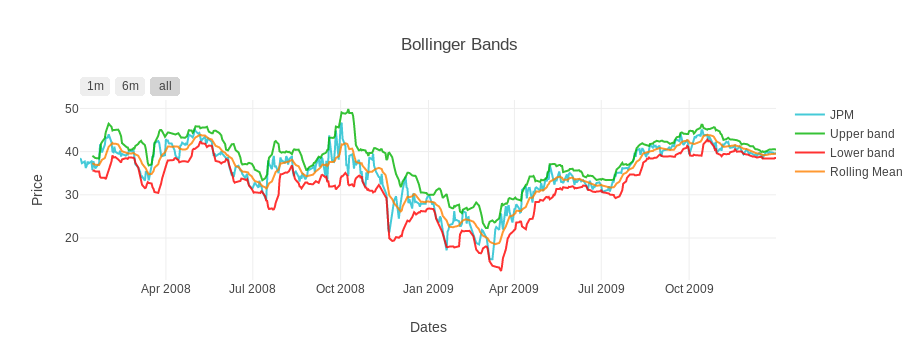

In [80]:
test_run(True)

#### Description

**Bollinger bands:**
* It's a volatity indicator.
* Measures the “highness” or “lowness” of price, relative to previous trades.
* The idea is to add a band 2 standard deviations above and 2 standard deviations below (upper band and lower band).

**Buy signal**
If we drop below the lower band and then up back through it, that is potentially right there a buy signal, because the hypothesis there is that we've gone quite far from the simple moving average. And we're now moving back towards it. if you buy there, you should anticipate positive returns as it climbs back through the average.


**Sell signal**
Where you see it punch through the upper band and then go back down through, that's potentially a sell signal.



### Simple moving average (SMA)


In [97]:
"""Simple moving average (SMA)"""

def SMA(values, window): 
    """Return Simple moving average of given values, using specified window size."""
    sma = pd.Series(values.rolling(window,center=False).mean()) 
    return sma

def test_run(plotly=False):
    # Read data
    dates = pd.date_range('2008-01-01', '2009-12-31')
    symbols = ['JPM']
    df = get_data(symbols, dates)

    # Compute sma
    # 1. Compute SMA
    sma_JPM = SMA(df['JPM'], window=10)

    if plotly==False:
        # Plot raw JPM values, rolling mean and Bollinger Bands
        plt.figure(figsize=(16,8))

        ax = df['JPM'].plot(title="Simple Moving Average ", label='JPM')
        sma_JPM.plot(label='SMA', ax=ax)
        

        # Add axis labels and legend
        ax.set_xlabel("Date")
        ax.set_ylabel("Price")
        ax.legend(loc='upper left')
        plt.show()
    else:
        trace_symbol = go.Scatter(
                x=df.index,
                y=df['JPM'],
                name = "JPM",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

        trace_sma = go.Scatter(
                x=df.index,
                y=sma_JPM,
                name = "SMA",
                line = dict(color = '#FF8000'),
                opacity = 0.8)
        
        
        
        data = [trace_symbol, trace_sma]

        layout = dict(
            title = "Simple Moving Average (SMA)",
            xaxis = dict(
                    title='Dates',
                    rangeselector=dict(
                        buttons=list([
                            dict(count=1,
                                 label='1m',
                                 step='month',
                                 stepmode='backward'),
                            dict(count=6,
                                 label='6m',
                                 step='month',
                                 stepmode='backward'),
                            dict(step='all')
                        ])
                    ),
                    range = [dates.values[0], dates.values[1]]),
            
            yaxis = dict(
                    title='Price')
                    
            )
        
        

        fig = dict(data=data, layout=layout)
        iplot(fig)

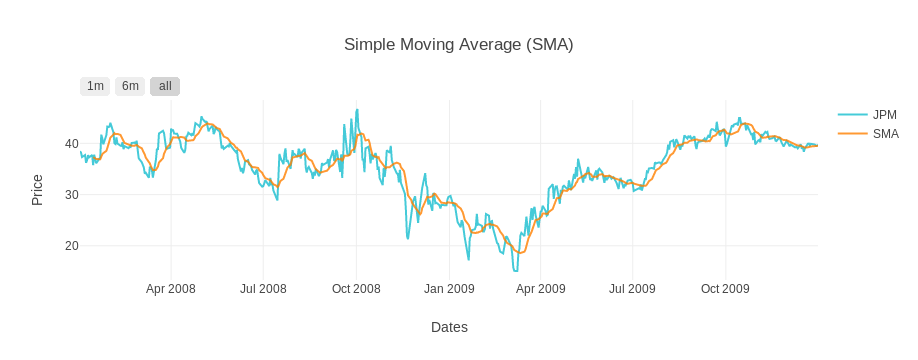

In [98]:
test_run(True)

#### Description

The moving average is one of the most widely used technical indicators. It is used along with other technical indicators or it can form the building block for the computation of other technical indicators.

A “moving average” is average of the asset prices over the “x” number of days/weeks. The term “moving” is used because the group of data moves forward with each new trading day. For each new day, we include the price of that day and exclude the price of the first day in the data sequence.

**Estimation**
To compute a 10-day window SMA, we take the sum of prices over 10 days and divide it by 10. To arrive at the next data point for the 20-day SMA, we include the price of the next trading day while excluding the price of the first trading day. This way the group of data moves forward.

The SMA assigns equal weights to each price point in the group. 

**Analysis**
The moving average tells whether a trend has begun, ended or reversed. The averaging of the prices produces a smoother line which makes it easier to identify the underlying trend. However, the moving average lags the market action.

A shorter moving average is more sensitive than a longer moving average. However, it is prone to generate false trading signals.

**Signals**
When the *closing price moves above the moving average, a buy signal is generated and vice versa*.  When using a single moving average one should select the averaging period in such a way that it is sensitive in generating trading signals and at the same time insensitive in giving out false signals.